# TP 1: Análisis Exploratorio de Datos

**Integrantes:**
- Müller, Lautaro
- Sorati, Gaston
- Canavese, Ricardo

**Fecha de entrega:** 10 de Abril del 2023

## Información sobre el dataset:
El dataset que se va a trabajar durante este trabajo práctico está compuesto por 9 columnas y 539383 filas. Dicho dataset contiene datos historicos vuelos.

Crearemos un subconjunto de datos eliminando la columna **Id**, ya que no nos aportara informacion y nos podria generar inconvenientes a la hora de entrenar.

## Diccionario de datos
 
| Variable      |Definición                                                                | ¿Es utilizada? | Entrada/Salida |
|:--------------|:-------------------------------------------------------------------------|:--------------|:----------------|
|  id  |   Número correlativo de vuelos.                   | NO                              | -                             |
|  Airlines  | Nombre abreviado de la aerolinea.                | SI              | ENTRADA                                  |
|   Flight   | Número del vuelo.                            | SI              | ENTRADA                                   |
|   AirportFrom   | De qué aeropuerto salió el vuelo.                         | Si                 | ENTRADA                         |
|    AirportTo  | A qué aeropuerto llegó el vuelo                 | SI           | ENTRADA                                        |
| DayOfWeek  | Día de la semana del vuelo.                 | NO           | -                                                |         
| Time  | Hora de salida expresada en minutos.                  | SI           | ENTRADA                              |
| Length  | Distancia de vuelo expresado en millas.                 | SI           | ENTRADA                              |
| Delay  | Si el vuelo esta demorado.                 | SI           | SALIDA                                      |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings
import plotly.express as px
from sklearn.preprocessing import minmax_scale

In [2]:
#Importar .csv
dataset=pd.read_csv('Airlines.csv')
dataset.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


## Variable de salida:
La variable de salida **"Delay"** puede tener los siguientes valores:
 - **1:** En el caso de que el vuelo este demorado.
 - **0:** En el caso de que el vuelo no este demorado.

La variable de salida se encuentra en forma binaria, no requiere ningun tratamiento extra.

## Transformaciones para variables de entrada: Limpieza y pre-procesado

### Valores nulos:

In [3]:
dataset.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [4]:
#Eliminamos los nulos
nuevo_dataset = dataset.dropna()

In [5]:
#Nuevo dataset con datos procesados
process_dataset = nuevo_dataset.copy()

## Variables no utilizadas:

- Variables : **id** 
    - Descripcion: No tiene relevancia en la predicción de la variable de salida.
    
    Esta variable id nos generaría que el modelo se sobreentrene produciendo así overfitting, lo cual representa un problema a la hora de predecir.
    

In [6]:
process_dataset = process_dataset.drop(['id'],axis=1)

### Pre-Procesamiento: Escalar

In [7]:
#Escalar:Flight,DayOfWeek,Time,Length
process_dataset[['Flight','DayOfWeek','Time','Length']] = minmax_scale(process_dataset[['Flight','DayOfWeek','Time','Length']])

Cambiamos los rangos de valores de las columnas, sin alterar su distribución ya que algunos modelos convergen mas rapido, y ademas muchos modelos sufren cuando hay valores que dominan las operaciones por estar en rangos mas grandes

### Pre-procesamiento: One-hot encoder de la variable "Airline":

In [8]:
process_dataset.Airline.unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [9]:
#One Hot-Ecoder Variable: Airline

for airline in process_dataset.Airline.unique():
    process_dataset[airline]= (process_dataset.Airline==airline)

process_dataset=process_dataset.drop(['Airline'],axis=1)
pd.set_option('display.max_columns',None)
process_dataset.head()

,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,CO,US,AA,AS,DL,B6,HA,OO,9E,OH,EV,XE,YV,UA,MQ,FL,F9,WN
0,0.034302,SFO,IAH,0.333333,0.003499,0.312977,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.199283,PHX,CLT,0.333333,0.003499,0.338931,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.307052,LAX,DFW,0.333333,0.006998,0.251908,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.315500,SFO,DFW,0.333333,0.006998,0.297710,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.013695,ANC,SEA,0.333333,0.013996,0.308397,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Análisis de la variable de salida:
### Balanceo:

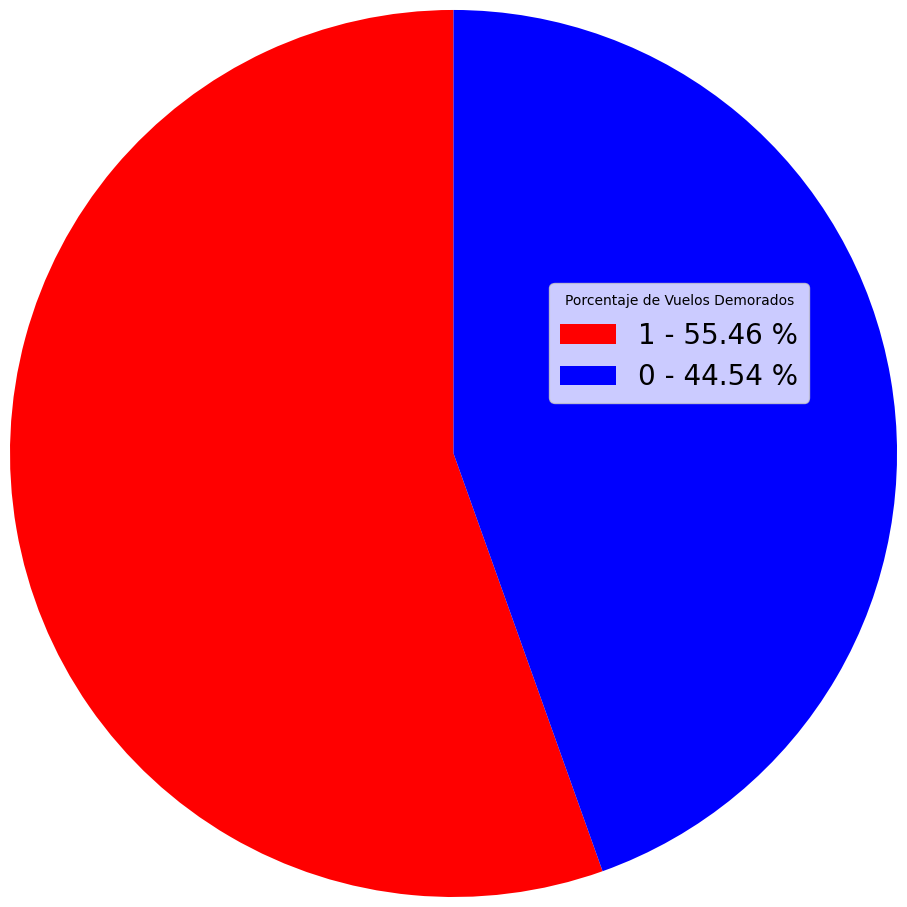

In [10]:
#Datos de salida Balanceo de datos

import matplotlib.pyplot as plt
import numpy as np

x = process_dataset.Delay.unique()
y = process_dataset.Delay.value_counts()

colors = ['red','blue']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]



plt.legend(patches, labels, title="Porcentaje de Vuelos Demorados",
           prop={'size': 20},
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**Análisis de blanceo:** como se puede observar en la partir gráfica presentada, los datos están desbalanceados levemente. Se puede notar que un 55.46% el porcentaje de vuelos demorados, en comparación con el 44.54% los no demorados.

A pesar de ello, era el resultado que esperabamos en función a los datos ya que podemos notar que refleja la verdadera relación entre los posibles valores de nuestro target. Por ello se decidió no descartar el dataset en cuestión y continuar con la predicción.

Por otro lado, al tener conocimiento sobre este desbalanceo de los datos, podemos establecer a qué métricas no debemos darles tanta importancia, como es el caso de Accuracy, ya que ésta métrica presenta problemas con este tipo de datasets.

In [12]:
#VARIABLE DELAY
px.histogram(nuevo_dataset.sort_index(),x='Airline',color='Delay',barmode='group')

## Análisis de las variables de entrada:

*Análisis de la variable **Delay***: 

En función a la grafica presentada se pueden relizar las siguientes observaciones:
 - La mayor cantidad de vuelos demorados
 
 
 - Como se esperaba, la mayor cantidad de vuelos está concentrada en aquella aerolinea clasificada como WN.
 
 
 - También podemos observar que aquellas aerolineas clasificados como HA y F9 fueron los que menos vuelos realizaron. 
 